## iPython Book para analisis de QuickSort

In [5]:
import random
import statistics
import math

import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
def randomquicksort(alist,times):
   comp = [0]
   randomquicksorthelper(alist,0,len(alist)-1,comp)
   times.append(comp[0])

In [7]:
def randomquicksorthelper(alist,first,last,comp):
   if first<last:

       r = randompartition(alist,first,last)
       splitpoint = r[0]
       tmp = comp.pop()
       comp.append(tmp+r[1])
    
       randomquicksorthelper(alist,first,splitpoint-1,comp)
       randomquicksorthelper(alist,splitpoint+1,last,comp)

In [8]:
def randompartition(alist,first,last):
  
   indxpiv = random.randint(first,last)
   temp = alist[indxpiv]
   alist[indxpiv] = alist[first]
   alist[first] = temp
   
   pivotvalue = alist[first]
   compspart = 0

   leftmark = first+1
   rightmark = last

   done = False
   while not done:

       while leftmark <= rightmark and alist[leftmark] <= pivotvalue:
           leftmark = leftmark + 1
           compspart = compspart + 1
       compspart = compspart + 1

       while alist[rightmark] >= pivotvalue and rightmark >= leftmark:
           rightmark = rightmark -1
           compspart = compspart + 1
       compspart = compspart + 1

       if rightmark < leftmark:
           done = True
       else:
           temp = alist[leftmark]
           alist[leftmark] = alist[rightmark]
           alist[rightmark] = temp

   temp = alist[first]
   alist[first] = alist[rightmark]
   alist[rightmark] = temp


   return rightmark,compspart

In [9]:
def randomquicksorttimedistrib(s,r):
    
    # Create an array of 1 .. n  
    n=s
    runs=r
    x = []
    for i in range(1,n+1):
        x.append(n+1-i)
    
     # Run quicksort for each permutation
    tlist =[]
    for p in range(1,runs+1):
          y = list(x)
          randomquicksort(y,tlist)
          
    count = 0
    for i in range (len(tlist)):
        if (tlist[i] >= 96):
            count += 1
            
            
    plt.hist(tlist, facecolor='g')
    plt.title("Number of comparison of Quicksort for all permutaions")
    plt.xlabel("Comparisons of elements")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()
    
    Eaverage = statistics.mean(tlist)
    
    print "Size=",n
    print "Runs=",runs
    print "Mean=",Eaverage
    print "Stdev=",statistics.stdev(tlist)
    print "Min=",min(tlist)
    print "Max=",max(tlist)
    print "Theoretical average=", 16*math.log(16)/math.log(2)
    print "Experimental average - theoretical average=", Eaverage - 16*math.log(16)/math.log(2)
    print "Probability it takes than 1.5 times more than the theoretical average=", float(count)/float(len(tlist))

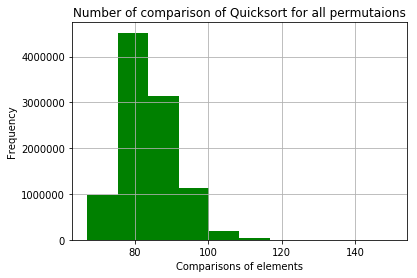

Size= 16
Runs= 10000000
Mean= 83.6606434
Stdev=

 7.09150986229
Min= 67
Max= 150
Theoretical average=

 64.0
Experimental average - theoretical average= 19.6606434
Probability it takes than 1.5 times more than the theoretical average= 0.0657533


In [10]:
randomquicksorttimedistrib(16,10000000)